# NLP - Project: Sentiment Analysis and Classification

In this notebook, sentiment analysis and a classification task are performed on a dataset. First, the necessary modules are imported. 

In [18]:
import pandas as pd
import requests
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

The dataset used is part of a competition , based around Natural Language Processing with Disaster Tweets. The data is comprised of three separate sets:  train.csv, test.csv and sample_submission.csv. 
The sample_submission.csv is not relevant for the purpose of this notebook. 
The train.csv and test.csv consist of tweets which either are about the topic of (natural) disasters, or are not. If they are about disasters, the target parameter is 1, otherwise it is 0. 

Firstly, a classification task, using machine learning, is performed with the dataset. 
Secondly, sentiment analysis is performed. 

In [2]:
df_test = pd.read_csv('test.csv')
df_test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [4]:
pd.set_option('display.max_colwidth', None) #to view the whole tweets, to get an overview of the data
df_test["text"].sample(10)

2287         Pandemonium In Aba As Woman Delivers Baby Without Face (Photos): According to eye witnesses in Ogbor Hill in A... http://t.co/lJYIG8RBOQ
2553    Can't stand when ppl BeyoncÌ©'fy certain tunes nd u lot will b screaming 'yaaasss' low it I'm not tryna hear a xfactor rendition of burna boy
1772            #ine #instyle Olap #world pres: http://t.co/PJaY74M2Fi How To Recognize A Hazardous Waste And The Multidimensi http://t.co/vr3wlQXl0G
3114                       #AskConnor there's a zombie apocalypse. the item to your right is your weapon. you're either screwed or you're gonna live.
89           Cop pulls drunk driver to safety SECONDS before his car is hit by train. http://t.co/cSsc8HcsXnåÊ http://t.co/jBlGyLCsAy via @ViralSpell
1552                                                                          @noobde this monkey will be a good character in mkx lol banana fatality
1770                                                            @SuperBobbyPires Hazard Ronaldo Cant

In [5]:
df_train = pd.read_csv('train.csv')
df_train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1
6,10,NaN,NaN,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in the woods...,1
8,14,NaN,NaN,There's an emergency evacuation happening now in the building across the street,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our area...,1


In [6]:
df_sample = pd.read_csv('sample_submission.csv')

In [7]:
# Text preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [8]:
local_stopwords = ["bruh", "wow", "bro", "utc"]

def preprocess_text(text):
    text = re.sub(r"http\S+|https\S+", "", text) #removes http.. or https.. sequences
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    text = re.sub("@\S+", "", text)  #removes usernames
    text = re.sub("[^a-zA-Z]", " ", text) #removes everything except letters
    text = re.sub("utc", "", text) 
    text = text.lower()
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and word not in local_stopwords]
    return ' '.join(text)

#-utc, bruh, wow, bro

In [9]:
df_test['processed_text'] = df_test['text'].apply(preprocess_text)

In [10]:
df_test.head(10)

,id,keyword,location,text,processed_text
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",heard earthquake different city stay safe everyone
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",forest fire spot pond goose fleeing across street cannot save
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake,shaking earthquake
6,21,NaN,NaN,"They'd probably still show more life than Arsenal did yesterday, eh? EH?",probably still show life arsenal yesterday eh eh
7,22,NaN,NaN,Hey! How are you?,hey
8,27,NaN,NaN,What a nice hat?,nice hat
9,29,NaN,NaN,Fuck off!,fuck


In [11]:
df_train['processed_text'] = df_train['text'].apply(preprocess_text)

In [12]:
df_train

,id,keyword,location,text,target,processed_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,two giant crane holding bridge collapse nearby home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,control wild fire california even northern part state troubling
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,km volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigating bike collided car little portugal bike rider suffered serious non life threatening injury


In [13]:
print(df_train.shape)

(7613, 6)


Just to be safe, the columns present in df_train and df_test are checked. 

In [15]:
print(df_train.columns)

Index(['id', 'keyword', 'location', 'text', 'target', 'processed_text'], dtype='object')


In [16]:
print(df_test.columns)

Index(['id', 'keyword', 'location', 'text', 'processed_text'], dtype='object')


In the following step, the algorithm is trained with 20% of the df_train dataset.

In [19]:
train_text, test_text, train_labels, test_labels = train_test_split(
    df_train['processed_text'], df_train['target'], test_size=0.2, random_state=42)

vectorizer = CountVectorizer()

train_features = vectorizer.fit_transform(train_text)

# Naive Bayes classifier
classifier = MultinomialNB()

classifier.fit(train_features, train_labels)

test_features = vectorizer.transform(test_text)

predictions = classifier.predict(test_features)

accuracy = (predictions == test_labels).mean()
print("Accuracy:", accuracy)


Accuracy: 0.7971109652002626


According to the accuracy-value from above, the model is able to make predictions, which are true in 79,78%. The classification task does seem to work with this specific dataset. 

## Sentiment Analysis

For sentiment analysis, the following research questions are phrased: 

### Research Questions: 
- Is there a significant difference between tweets which are associated with the topic of (natural) disasters and tweets which are not? The difference is determined using sentiment analysis. 
- Is there a significant difference between two different algorithms used in sentiment analysis?

### Hypothesis
- There is a significant difference between tweets which are associated with the topic of (natural) disasters and tweets which are not. 
- There is no difference between the two different algorithms used for sentiment analysis. 

In [23]:
from textblob import TextBlob

df_train['processed_text'] = df_train['text'].apply(preprocess_text)
sentiments_train = []
for text in df_train['processed_text']:
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    sentiments_train.append(sentiment)

# Füge die Ergebnisse zur Dataframe hinzu
df_train['sentiment'] = sentiments_train

# Zeige den aktualisierten Dataframe an
df_train

,id,keyword,location,text,target,processed_text,sentiment
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u,0.000000
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,0.100000
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected,-0.100000
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california,0.000000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school,0.000000
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,two giant crane holding bridge collapse nearby home,0.000000
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,control wild fire california even northern part state troubling,0.100000
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,km volcano hawaii,0.000000
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigating bike collided car little portugal bike rider suffered serious non life threatening injury,-0.260417


Now the mean value is calculated for: 
1. tweets with the target value 0
2. tweets with the target value 1

In [28]:
average_sentiment_target_0 = df_train[df_train['target'] == 0]['sentiment'].mean()

average_sentiment_target_1 = df_train[df_train['target'] == 1]['sentiment'].mean()

print("average value for target = 0:", average_sentiment_target_0)
print("average value for target = 1:", average_sentiment_target_1)


average value for target = 0: 0.0645153036588435
average value for target = 1: 0.008473660095297209


In general, values close to one represent a positive sentiment and values close to -1 represent a negative sentiment. Both values are close to zero. The value for tweets with target = 1 (which means they are about disasters) is lower than the one for tweets which were not semantically associated with being about a disaster. Still, both groups score close to 0, which indicates the overall sentiment is neutral. This may be surprising, considering the context of the topic of disasters. 

To answer research question one, there is a difference according to sentiment analysis between tweets which are about disasters and tweets which are not. Still, the difference is not considered to be significant, so hypothesis one is not verified. 
One reason may be, that the tweets, being about disasters or not, still are semantically close with regard to addressing topics which are not associated with positive topics (e.g.: topic of car crash). This may be caused by the aim of the competition, in which this dataset is used: to train a machine learining algorithm to differenciate between "local" accidents like a car crash and disasters, like an earthquake.  

For insight, in the following step, 5 tweets which are among the tweets with the most positive and the most negative sentiment score are evaluated. 

In [32]:
most_positive_tweets = df_train.nlargest(5, 'sentiment')

print("Most Positive Tweets:")
most_positive_tweets[['processed_text', 'sentiment']]

Most Positive Tweets:


,processed_text,sentiment
23,wonderful day,1.0
47,building perfect tracklist life leave street ablaze,1.0
128,remembering going die best way know avoid trap thinking something lose steve job,1.0
308,best movie ever seen armageddon,1.0
413,nowplaying arsonist mc impressed,1.0


In [33]:
most_negative_tweets = df_train.nsmallest(5, 'sentiment')

print("\nMost Negative Tweets:")
most_negative_tweets[['processed_text', 'sentiment']]


Most Negative Tweets:


,processed_text,sentiment
143,horrible accident man died wing airplane,-1.0
145,horrible accident man died wing airplane watchthevideo,-1.0
152,unbelievably insane man airport airplane aircraft aeroplane runway accident freaky,-1.0
153,horrible accident man died wing airplane,-1.0
154,horrible accident man died wing airplane,-1.0


To have a comparison, besides textblob, crowdflower is used to perform sentiment analysis.  

In [34]:
df_train['processed_text'] = df_train['text'].apply(preprocess_text)

#sentiment analysisi with textblob
sentiments_textblob = []
for text in df_train['text']:
    preprocessed_text = preprocess_text(text)
    blob = TextBlob(preprocessed_text)
    sentiment = blob.sentiment.polarity
    sentiments_textblob.append(sentiment)

    #sentiment analysis with crowdflower
sentiments_crowdflower = []
url = 'http://www.sentiment140.com/api/bulkClassifyJson'
data = [{'text': preprocess_text(text)} for text in df_train['text']]
response = requests.post(url, json={'data': data})
json_response = response.json()
for result in json_response['data']:
    sentiment = result['polarity']
    sentiments_crowdflower.append(sentiment)

df_train['sentiment_textblob'] = sentiments_textblob
df_train['sentiment_crowdflower'] = sentiments_crowdflower

df_train

,id,keyword,location,text,target,processed_text,sentiment,sentiment_textblob,sentiment_crowdflower
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,deed reason earthquake may allah forgive u,0.000000,0.000000,2
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,0.100000,0.100000,2
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,resident asked shelter place notified officer evacuation shelter place order expected,-0.100000,-0.100000,2
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1,people receive wildfire evacuation order california,0.000000,0.000000,2
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,got sent photo ruby alaska smoke wildfire pours school,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse into nearby homes http://t.co/STfMbbZFB5,1,two giant crane holding bridge collapse nearby home,0.000000,0.000000,2
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control wild fires in California even in the Northern part of the state. Very troubling.,1,control wild fire california even northern part state troubling,0.100000,0.100000,2
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. http://t.co/zDtoyd8EbJ,1,km volcano hawaii,0.000000,0.000000,2
7611,10872,NaN,NaN,Police investigating after an e-bike collided with a car in Little Portugal. E-bike rider suffered serious non-life threatening injuries.,1,police investigating bike collided car little portugal bike rider suffered serious non life threatening injury,-0.260417,-0.260417,2


The values obtained using crowdflower can be interpreted in the following way: 
- 0: negative
- 2: neutrale
- 4: positive

In [36]:
mean_sentiment_textblob = df_train['sentiment_textblob'].mean()
mean_sentiment_crowdflower = df_train['sentiment_crowdflower'].mean()

print("average value - TextBlob:", mean_sentiment_textblob)
print("average value - CrowdFlower:", mean_sentiment_crowdflower)

average value - TextBlob: 0.04043646271619804
average value - CrowdFlower: 1.8717982398528832


To answer the second research question, there seems to be no significant difference between the results obtained from the two different methods with this dataset. So hypothesis two can be verified. 

## Visualization of the results

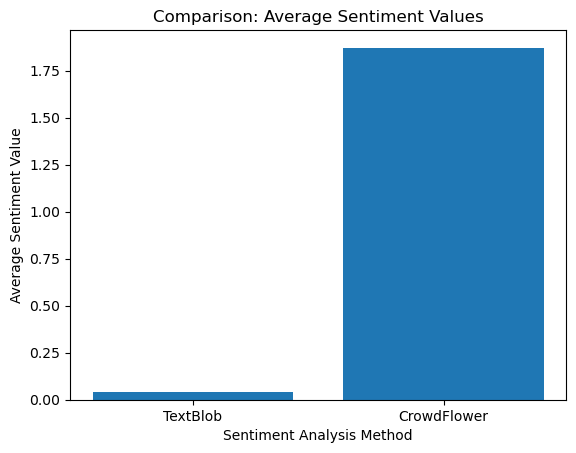

In [42]:
import matplotlib.pyplot as plt

mean_sentiment_textblob = df_train['sentiment_textblob'].mean()
mean_sentiment_crowdflower = df_train['sentiment_crowdflower'].mean()

labels = ['TextBlob', 'CrowdFlower']
sentiment_means = [mean_sentiment_textblob, mean_sentiment_crowdflower]

plt.bar(labels, sentiment_means)
plt.xlabel('Sentiment Analysis Method')
plt.ylabel('Average Sentiment Value')
plt.title('Comparison: Average Sentiment Values')

plt.show()

### References

- https://www.kaggle.com/competitions/nlp-getting-started/overview
- https://chat.openai.com/share/ce50357c-63f1-4991-b18f-451224730b7c
- https://chat.openai.com/share/2133311c-f085-4bcf-824b-2a6c9bf59066
- https://www.kaggle.com/code/paoloripamonti/twitter-sentiment-analysis
- https://www.kaggle.com/code/stoicstatic/twitter-sentiment-analysis-for-beginners
- https://arxiv.org/pdf/2109.10255.pdf